## Importação das biliotecas

- tensorflow: biublioteca para processamento de dados e contrução de CNN
- matplot: biblioteca de para geração de iamgens gráficas

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Trasnsforma uma imgem em dataset

- IMAGE_PATH: caminho da imagem nas pastas
- load_img: carrega a imagem já no tamanho comum parta treinamento (224X224 pixels)
- img_to_array: transforma a imagem em um tensor
- image / 255.0: normaliza os pixels de valores entre 0-255 (padrão de imagens) para 0-1 (padrão treinamento)
- expand_dims: adiociona uma dimensão de batch, uma vez que o modelo espera várias imagens
- repeat: repete a mesma imagem 9 vezes


In [24]:
IMAGE_PATH = "../data/proof_of_concept/train/cats/cat.1.jpg"

image = tf.keras.utils.load_img(IMAGE_PATH, target_size=(224, 224))

image = tf.keras.utils.img_to_array(image)

image = image / 255.0

image = tf.expand_dims(image, axis=0)

image_batch = tf.repeat(image, repeats=9, axis=0)

## Denfinindo e aplicando padrões de aumentação

- RandomFlip: inverte a imagem na horizontal
- RandomRotation: gira a imagem (0.1 equivale a 10% da circunferência, para radiografias usar apenas 5%, aprox. 10-15 graus)
- RandomZoom: dá zoom na imagem (0.2 equivale a 20% do tamanho da imagem, para radiografias usar apenas 10%)

In [29]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

augmented_image = data_augmentation(image_batch, training=True)

## Plota as imagens após passarem pela aumentação de dados

- plt.figure: define uma imagem e controla o tamanho que ela vai aparecer na tela
- plt.subplot: define que será uma grade com 3X3 imagens e o índice da imagem (que muda a cada interação)
- plt.imshow: mostra a imagem
- plt.axis:  deixa a visualização mais limpa (sem régua na imagem)

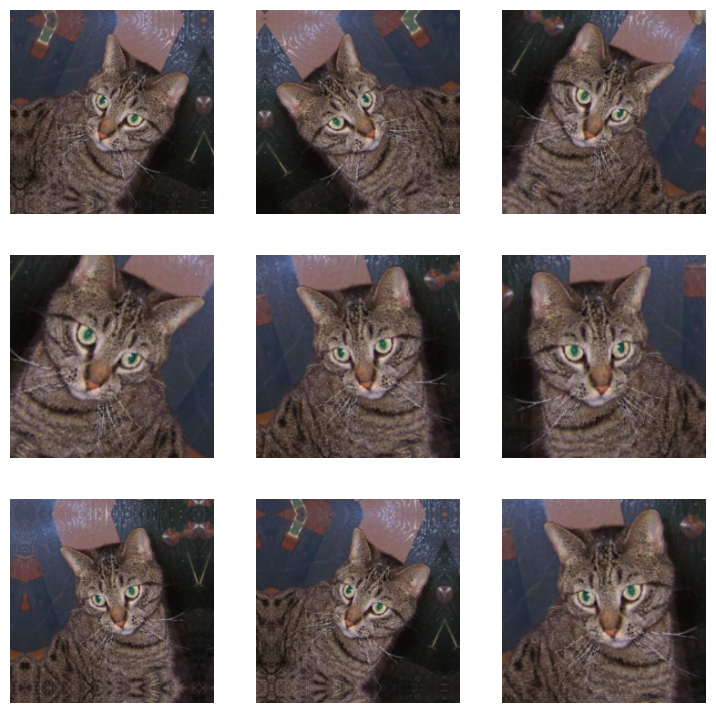

In [30]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[i])
    plt.axis("off")